# Final Project: Maven Mart Analysis

### Main Skills to focus on:
    - utilizing the Pandas, Numpy, Matplotlib libraries
    - importing specific data in the cleanest and most efficient way possible while optimizing memory useage
    - exploratory data analysis (descrciptive statistics, missing data, outliers, understanding data, data cleaning, etc.)
    - creating columns and ammending currnet ones for analysis
    - data agggregations (pivot tables, grouping, etc.)
    - filtering data with SQL syntax via PowerQuery and iloc/loc methods
    - visualization of data 
    - exporting data with proper formats 

# Project Outline:

## Objective 1: Import Store Transactions Data
1. set the appropiate data types
2. use certain columns only (`household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`)

## Objective 2: Time Based Analysis 
1. create additional columns 'total_sales' and 'date'
2. set the index of transactions df to 'date'
3. Analysis
    - Plot the sum of sales by month. Are sales growing over time?
    - Next, plot the same series after filtering down to dates April 2016 and October 2017.
    - Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
    - Finally, plot total sales by day of week.
    
## Objective 3: Demographic Data Analysis
1. read in the hh_demographic.csv file 
3. use certain columns only ('AGE_DESC', 'INCOME_DESC', 'household_key', and 'HH_COMP_DESC'
4. convert the appropriate columns to the category dtype
5. Analysis
    - Group the transactions table by household_id, and calculate the sum of SALES VALUE by household.
    - Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.
    - Plot the sum of sales by age_desc and income_desc (in separate charts).
    - Then, create a pivot table of the mean household sales by AGE_DESC and HH_COMP_DESC. Which of our demographics have the highest average sales?
    
## Objective 4: Export
1. Export your pivot table (from the last part of objective 3) to an excel file. Make sure to provide a sheet name.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import calmap

In [2]:
# import store transactions data
# set appropriate dtypes
# use certain columns only 

transactions = pd.read_csv('/Users/jairusmartinez/Desktop/Python_Data_Analysis /Pandas Course Resources/project_data/project_transactions.csv',
                           dtype={'household_key': 'Int16', 'DAY': 'Int16', 'QUANTITY': 'Int32'},
                           usecols=['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE']
                          )

In [5]:
# look at the dtypes, columns, and memory useage

transactions.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  Int16  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     int64  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(2), Int32(1), float64(1), int64(2)
memory usage: 71.6 MB


In [6]:
# preview data

transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
0,1364,26984896261,1,842930,1,2.19
1,1364,26984896261,1,897044,1,2.99
2,1364,26984896261,1,920955,1,3.09
3,1364,26984896261,1,937406,1,2.50
4,1364,26984896261,1,981760,1,0.60
...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99
2146307,1598,42305362535,711,114102,1,8.89
2146308,1598,42305362535,711,133449,1,6.99
2146309,1598,42305362535,711,6923644,1,4.50


In [7]:
# look at the outliers, means, and ranges 
# will help understand the data as well as the appropriate dtypes to use

transactions.describe().round(2)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
count,2146311.00,2.146311e+06,2146311.00,2146311.00,2146311.00,2146311.00
mean,1056.23,3.404897e+10,389.51,2884714.94,100.97,3.11
std,605.01,4.723748e+09,190.05,3831949.29,1152.36,4.19
min,1.00,2.698490e+10,1.00,25671.00,0.00,0.00
25%,548.00,3.040798e+10,229.00,917231.00,1.00,1.29
50%,1042.00,3.281176e+10,392.00,1027960.00,1.00,2.00
75%,1581.00,4.012804e+10,555.00,1132771.00,1.00,3.49
max,2099.00,4.230536e+10,711.00,18316298.00,89638.00,840.00


In [8]:
# check for missing data

transactions.isna().sum()

household_key    0
BASKET_ID        0
DAY              0
PRODUCT_ID       0
QUANTITY         0
SALES_VALUE      0
dtype: int64

In [9]:
# Creating date column from 'DAY' column:

# we need to create a new 'date' column because the only date is thorugh the 'DAY' column which just list an integer representing
# what day number relative to the day the first transaction occured 
    
# we will grab day # and subtract 1 so that day 1 starts at 0
# turn day into a string and add the string 'days' so it will be in the format '0 days' (which is the format of the timedelta dtype)
# convert that into a timedelta dtype

pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + ' days')

0           0 days
1           0 days
2           0 days
3           0 days
4           0 days
            ...   
2146306   710 days
2146307   710 days
2146308   710 days
2146309   710 days
2146310   710 days
Name: DAY, Length: 2146311, dtype: timedelta64[ns]

In [10]:
# assume that day 1 starts on 2016-01-01 
# therefore, we must create an actual origical datetime timestamp that will represent day 0
# from there, we will add the time delta of the row to extrapolate a date

pd.to_datetime("2016", format='%Y') 

Timestamp('2016-01-01 00:00:00')

In [11]:
# timestamp (datetime) + number of days since day 0 (timedelta) will give us a properly formatted date!
# in the output, you can see that each row now has a real datetime (can now create a date column)

pd.to_datetime('2016', format='%Y') + pd.to_timedelta(transactions['DAY'].sub(-1).astype('str') + ' days')

0         2016-01-03
1         2016-01-03
2         2016-01-03
3         2016-01-03
4         2016-01-03
             ...    
2146306   2017-12-13
2146307   2017-12-13
2146308   2017-12-13
2146309   2017-12-13
2146310   2017-12-13
Name: DAY, Length: 2146311, dtype: datetime64[ns]

In [12]:
# now create the Date Column!
# df = df.assign()
# drop the original 'DAY' column so all that is left in terms of a time column is 'date'

transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

In [13]:
# make names all lower case

transactions.columns =[ col.lower() for col in transactions.columns]

# change household_key to household_id for part 2 

transactions = transactions.rename(columns={'household_key': 'household_id'})

In [14]:
# check the final dataset

transactions

,household_id,basket_id,product_id,quantity,sales_value,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01
...,...,...,...,...,...,...
2146306,1598,42305362535,92130,1,0.99,2017-12-11
2146307,1598,42305362535,114102,1,8.89,2017-12-11
2146308,1598,42305362535,133449,1,6.99,2017-12-11
2146309,1598,42305362535,6923644,1,4.50,2017-12-11


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

In [15]:
# must create a total_sales column

transactions = transactions.assign(total_sales = transactions.quantity * transactions.sales_value)

# time based analysis so want to set transaction index to date

transactions = transactions.set_index('date')

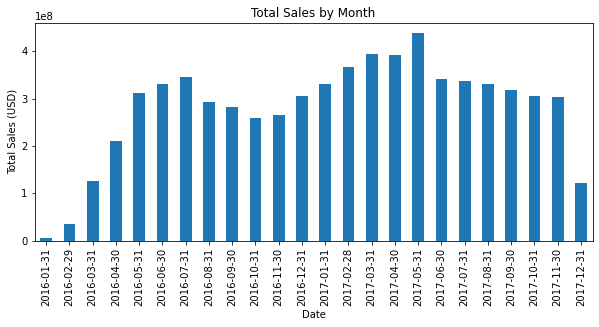

In [42]:
# Plot the sum of sales by month. Are sales growing over time? (1/2)

monthly_sales = (transactions.groupby(pd.Grouper(freq='M')).agg({'total_sales': 'sum'})) 
               
                 
(monthly_sales
 .plot(kind='bar',
       title='Total Sales by Month',
       xlabel='Date',
       ylabel='Total Sales (USD)',
       legend=False, 
       figsize=(10, 4))
 .set_xticklabels(monthly_sales.index.format())
);




<AxesSubplot:title={'center':'Total Sales by Month'}, xlabel='Date', ylabel='Total Sales (USD)'>

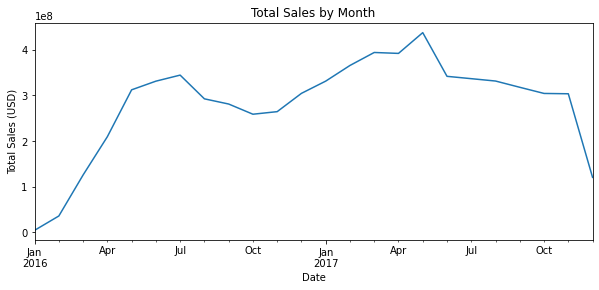

In [23]:
# Plot the sum of sales by month. Are sales growing over time? (2/2)

(transactions
 .groupby(pd.Grouper(freq='M'))
 .agg({'total_sales': 'sum'}) 
 .plot(title='Total Sales by Month',
       xlabel='Date',
       ylabel='Total Sales (USD)',
       legend=False, figsize=(10, 4))
)

In [20]:
filt_transactions = transactions.loc['2016-04':'2017-10']

In [ ]:
# Next, plot the same series after filtering down to dates April 2016 and October 2017.
(transactions
 .loc['2016-04':'2017-10']
 .groupby(filt_transactions.index)
 .agg({'total_sales': 'sum'}) 
 .plot(
     title='Total Sales (2016-04 to 2017-10)',
     xlabel='Date',
     ylabel='Total Sales (USD)',
     legend=False, figsize=(10, 4))
)

In [ ]:
# Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
(transactions
 .pivot_table(
     index=transactions.index.month,
     columns=transactions.index.year,
     aggfunc={'total_sales': 'sum'})
 .plot.bar(title='Comparison of Total Sales by Month',
           xlabel='Month', 
           ylabel='Total Sales')
 .legend(bbox_to_anchor=(1,1), 
         labels=['2016', '2017'])
)

In [ ]:
# Finally, plot total sales by day of week.
(transactions
 .groupby(transactions.index.dayofweek)
 .agg({'total_sales': 'sum'}) 
 .plot(kind='bar',
       title='Total Sales by Day of the Week',
       xlabel='Date',
       ylabel='Total Sales (USD)',
       legend=False, figsize=(10, 4))
)

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [ ]:
# Read in the hh_demographic.csv file, 
# but only the columns AGE_DESC, INCOME_DESC, household_key, and HH_COMP_DESC. 
# Convert the appropriate columns to the category dtype.

demographics = pd.read_csv('/Users/jairusmartinez/Desktop/Python_Data_Analysis /Pandas Course Resources/project_data/hh_demographic.csv',
                          usecols=['AGE_DESC', 'INCOME_DESC','household_key', 'HH_COMP_DESC'],
                          dtype={'AGE_DESC': 'category', 'INCOME_DESC': 'category', 'HH_COMP_DESC': 'category', 'household_key': 'Int16'}
                          )
# make the columns all lower case
demographics.columns = [col.lower() for col in demographics.columns]

# rename household key to household id
demographics = demographics.rename(columns={'household_key': 'household_id'})

In [ ]:
demographics

In [ ]:
demographics.info()

In [ ]:
# reset the transactions index
transactions = transactions.reset_index()

In [ ]:
# Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.
house_transactions = (transactions
                      .groupby('household_id')
                      .agg({'total_sales': 'sum'})
                     )

In [ ]:
# join the demographics DataFrame to the aggregated transactions table. 
# Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.

demo_transactions = house_transactions.merge(demographics,
                        how='inner',
                        left_on=['household_id'],
                        right_on=['household_id'])
demo_transactions.head()

In [ ]:
# Plot the sum of sales by age_desc 
(demo_transactions
 .groupby('age_desc')
 .agg({'total_sales': 'sum'})
 .plot(
     kind='bar',
     title='Total Sales by Age Bracket',
     ylabel='Total Sales (USD)',
     xlabel='Age Brackets',
     legend=False
 )
)

In [ ]:
list(demo_transactions['income_desc'].unique())

In [ ]:
# set an order to the income cateogrical column so that 
# the plot can be in order (otherwise, python will not order since the ranges are categorical strings)
demo_transactions['income_desc'] = pd.Categorical(demo_transactions['income_desc'],
                                            categories=['Under 15K','15-24K','25-34K','35-49K','50-74K','75-99K',
                                            '100-124K','125-149K','150-174K','175-199K','200-249K','250K+'], 
                                            ordered=True)

In [ ]:
# Plot the sum of sales by income_desc 
(demo_transactions
 .groupby('income_desc')
 .agg({'total_sales': 'sum'})
 #.sort_values('total_sales', ascending=False)
 .plot(
     kind='bar',
     title='Total Sales by Income Bracket',
     ylabel='Total Sales (USD)',
     xlabel='Income Brackets',
     legend=False
 )
)

In [ ]:
# Then, create a pivot table of the mean household sales by AGE_DESC and HH_COMP_DESC. 
# Which of our demographics have the highest average sales?
(demo_transactions
 .query("'Unknown' not in hh_comp_desc")
 .pivot_table(
     index=['age_desc', 'hh_comp_desc'],
     aggfunc=({'total_sales': 'mean'}))
 .sort_values('total_sales', ascending=False)
)

# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [ ]:
products = pd.read_csv('/Users/jairusmartinez/Desktop/Python_Data_Analysis /Pandas Course Resources/project_data/product.csv',
                     usecols=['PRODUCT_ID', 'DEPARTMENT'],
                     dtype={'DEPARTMENT': 'category'})

products.columns = [col.lower() for col in products.columns]

In [ ]:
products.head()

In [ ]:
# join product with transactions
products_transactions =(products.merge(transactions,
                                       how='inner',
                                       left_on='product_id',
                                       right_on='product_id'))

In [ ]:
# join product with demographics
# no similar columns so join product with transactions (key='product_id') first 
# then join demogrpahics (key='household_id')
maven_mart = (products_transactions.merge(demographics,
                                          how='inner',
                                          left_on='household_id',
                                          right_on='household_id')
             )

In [ ]:
list(maven_mart.department.unique())

In [ ]:
# in pivot table there is a blank department category 
# i have explored this data and assessed that I can delete the rows that are contained 
# this line will return all the indices with the blank value
# i will use this to drop all rows with the blank department value
maven_mart.loc[maven_mart.department ==  ' '].index

In [ ]:
# drop the blank department categories
maven_mart = maven_mart.drop(maven_mart.loc[maven_mart.department ==  ' '].index, axis=0)

In [ ]:
#Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales.
(maven_mart
 .pivot_table(
     index='department',
     columns='age_desc',
     aggfunc={'total_sales': 'sum'})
 .round(1)
 .sort_values('department')
 .droplevel(0, axis=1)
)

In [ ]:
# Which category does our youngest demographic perform well in?
# must drop the outer index so can index pivot table easily
(maven_mart
 .pivot_table(
     index='department',
     columns='age_desc',
     aggfunc={'total_sales': 'sum'})
 .round(1)
 .sort_values('department')
 .droplevel(0, axis=1)
).loc[:, '19-24'].sort_values(ascending=False).head()

# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [ ]:
age_department = (maven_mart
                     .pivot_table(
                         index='department',
                         columns='age_desc',
                         aggfunc={'total_sales': 'sum'})
                     .round(1)
                     .sort_values('department')
                     .droplevel(0, axis=1)
                 )

In [ ]:
age_department.to_excel('age_departments.xlsx', index=True)

In [ ]:
# read it in to check if it worked!
df = pd.read_excel('age_departments.xlsx')

In [ ]:
# yay it worked :)
df